# Customer Segmentation


Group Name: cust_seg

Specialization: Data Science

Submitted to: Data Glacier

Internship Batch: LISUM12

Team Member Details:
-	Brennan Clinch, bclincher98@gmail.com, USA, North Carolina State University, Data Science
-	Rohit Sunku, rgs8890@gmail.com, UK, Le Wagon, Data Science
-	Kutay Selçuk, kutay.selcuk@ozu.edu.tr, Turkey,  Ozyegin University, Data Science
-	Zhan Shi, zhanshi@g.ucla.edu, USA,  University of California Los Angeles, Data Science


Problem Description:

Santander Bank wants to roll out Christmas offers to their customers. But Santander Bank does not want to roll out the same offer to all customers. Instead, they want to roll out personalized offers to a particular set of customers. If they manually start understanding the category of the customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data (pattern which group certain kind of customer in one category). Santander Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 groups as this will be inefficient for their campaign.

ABC analytics assigned this talk to their analytics team and instructed their team to come up with the approach and feature which group similar behavior in one category and others in a different category.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cust = pd.read_csv("C://Users//JCCLI//Downloads//cust_seg_clean.csv")

## Change columns to English translation
cust.columns = ['Date', 'Customer_id', 'Employee index', 'Country', 'Gender', 'Age', 'Contract date', 'New customer index', 'Seniority(months)', 'Primary',
                'Customer type', 'Customer relation type', 'Residence index', 'Foreigner index', 'Channel', 'Deceased index',
               'Province name', 'Activity index', 'Income', 'Saving account', 'Guarantees', 'Current account', 'Derivada account',
              'Payroll account', 'Junior account', 'Most particular account', 'Particular account', 'Particular plus account', 'Short-term deposits', 'Medium-term deposits',
                'Long-term deposits', 'e-account', 'Funds', 'Mortage', 'Pensions_1', 'Loans', 'Taxes', 'Credit card', 'Securities', 'Home account', 'Payroll', 'Pensions_2', 'Direct debit']

In [3]:
cust.head()

,Date,Customer_id,Employee index,Country,Gender,Age,Contract date,New customer index,Seniority(months),Primary,...,Mortage,Pensions_1,Loans,Taxes,Credit card,Securities,Home account,Payroll,Pensions_2,Direct debit
0,2015-01-28,1375586,N,ES,H,34,2015-01-12,0.0,8,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,22,2012-08-10,0.0,37,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,22,2012-08-10,0.0,37,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,21,2012-08-10,0.0,37,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050615,N,ES,H,22,2012-08-10,0.0,37,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
cust.shape[0]

818259

In [5]:
len(cust.Customer_id.unique())

510617

#### General Customer Analysis

<AxesSubplot:xlabel='Sex', ylabel='count'>

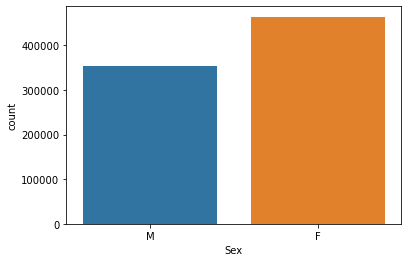

In [8]:
sns.countplot(x="Sex",data=cust)

In [7]:
## Change H/V to male or female
def gender(x):
    if x == 'H':
        return 'M'
    else:
        return 'F'
cust['Sex'] = cust['Gender'].apply(gender)

In [5]:
## Distribution of Channel
cust.Channel.value_counts().head(10)

KAT    262959
KFC    215771
KHE    201024
KFA     32524
KAS      7087
KAG      6847
KAA      5342
KAB      5245
KAY      4992
KHK      4823
Name: Channel, dtype: int64

In [6]:
# Distribution of Country
cust.Country.value_counts().head(10)


ES    818243
MX         4
PA         2
BE         2
IT         2
DE         2
BO         2
PY         2
Name: Country, dtype: int64

In [7]:
# Distribution of City
cust['Province name'].value_counts().head(10)

MADRID       329081
BARCELONA     74838
VALENCIA      39516
SEVILLA       38786
ZARAGOZA      21882
MALAGA        21501
CORUÑA, A     20801
MURCIA        19378
CADIZ         16692
ALICANTE      16198
Name: Province name, dtype: int64

In [8]:
# Distribution of Gender of customers by City
City_gender = pd.crosstab(cust['Province name'],cust['Sex'],margins = False)
print(City_gender)

Sex                          F       M
Province name                         
ALBACETE                  3513    3070
ALICANTE                  9664    6534
ALMERIA                   2074    1280
ASTURIAS                  8439    6691
AVILA                     1174     980
BADAJOZ                   5108    4861
BALEARS, ILLES            3166    1870
BARCELONA                45195   29643
BIZKAIA                      0       2
BURGOS                    3041    2590
CACERES                   3414    3445
CADIZ                     8946    7746
CANTABRIA                 5078    3575
CASTELLON                 2908    2147
CEUTA                      240     120
CIUDAD REAL               3814    3003
CORDOBA                   4660    3741
CORUÑA, A                10847    9954
CUENCA                    1450    1582
GIPUZKOA                     0       1
GIRONA                    2589    1821
GRANADA                   5759    4780
GUADALAJARA               2335    1386
HUELVA                   

#### Product Analysis

In [9]:
products = ['Saving account', 'Guarantees',
       'Current account', 'Derivada account', 'Payroll account',
       'Junior account', 'Most particular account', 'Particular account',
       'Particular plus account', 'Short-term deposits',
       'Medium-term deposits', 'Long-term deposits', 'e-account', 'Funds',
       'Mortage', 'Pensions_1', 'Loans', 'Taxes', 'Credit card', 'Securities',
       'Home account', 'Payroll', 'Pensions_2', 'Direct debit']

In [10]:
# Find percentage of products bought from customers
for product in products:
    per_customer = cust['Customer_id'][cust[product] == 1].nunique() / cust['Customer_id'].nunique() * 100
    print(f'{product} =  {round(per_customer, 5)}%')

Saving account =  0.01508%
Guarantees =  0.00372%
Current account =  78.16387%
Derivada account =  0.05072%
Payroll account =  10.17122%
Junior account =  1.30998%
Most particular account =  1.36756%
Particular account =  17.50098%
Particular plus account =  6.04837%
Short-term deposits =  0.23912%
Medium-term deposits =  0.27183%
Long-term deposits =  6.16176%
e-account =  10.23683%
Funds =  2.35362%
Mortage =  0.85348%
Pensions_1 =  1.26572%
Loans =  0.33371%
Taxes =  6.27887%
Credit card =  6.499%
Securities =  3.34419%
Home account =  0.55247%
Payroll =  7.32761%
Pensions_2 =  8.06338%
Direct debit =  16.89642%


In [10]:
total_products = cust.groupby('Customer_id')[products].sum()

In [130]:
# For use with Channel
total_products = df_channel.groupby('Customer_id')[products].sum()

In [11]:
for product in products:
    total_products[product] = total_products[product].apply(lambda x: 1 if x > 0 else 0)

In [12]:
total_products['total_products'] = total_products.sum(axis=1)

In [13]:
cust['total_products'] = cust[products].sum(axis=1)
total_products = total_products.drop(total_products[total_products.total_products == 0].index)
cust = cust.drop(cust[cust.total_products == 0].index)

In [133]:
df_channel['total_products'] == df_channel[products].sum(axis=1)
total_products = total_products.drop(total_products[total_products.total_products==0].index)
df_channel = df_channel.drop(df_channel[df_channel.total_products == 0].index)

- So since we are wanting to divide up customers into no more than 5 groups, we are wanting to segment customers into 5 groups exhibiting similar behavior

## Customer products by age

<AxesSubplot:>

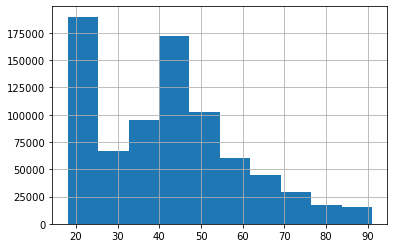

In [15]:
cust.Age.hist()

In [14]:
def age_group(x):
    if x < 21:
        return "less than 21"
    elif x >= 21 and x <= 30:
        return "21-30"
    elif x >= 31 and x <= 40:
        return "30-40"
    elif x >= 41 and x <= 65:
        return "41-65"
    else:
        return ">65"
cust['Age group']  = cust['Age'].apply(age_group)

Text(0.5, 1.0, 'Number of customers by age group')

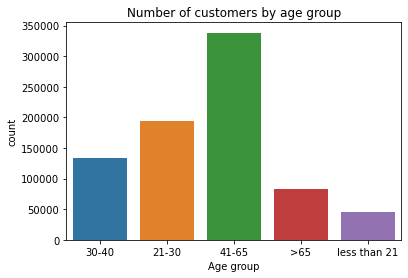

In [17]:
sns.countplot(x='Age group', data = cust)
plt.title("Number of customers by age group")

In [19]:
total_products = total_products.reset_index(level=0)
total_products = total_products.merge(cust[['Customer_id','Age group']], on='Customer_id')

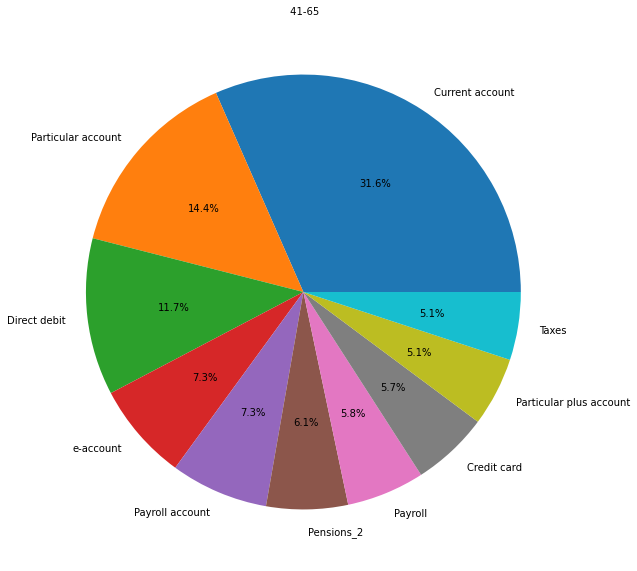

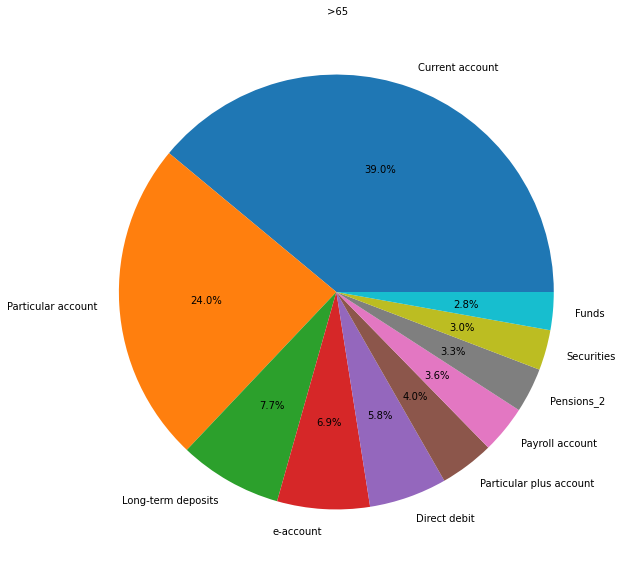

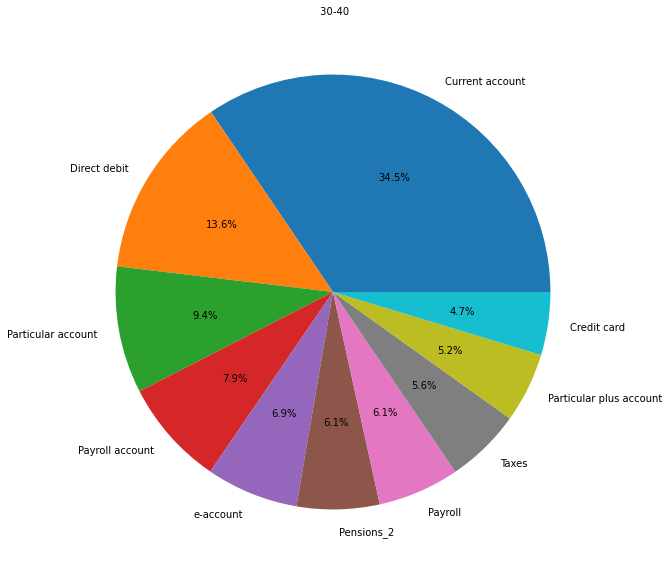

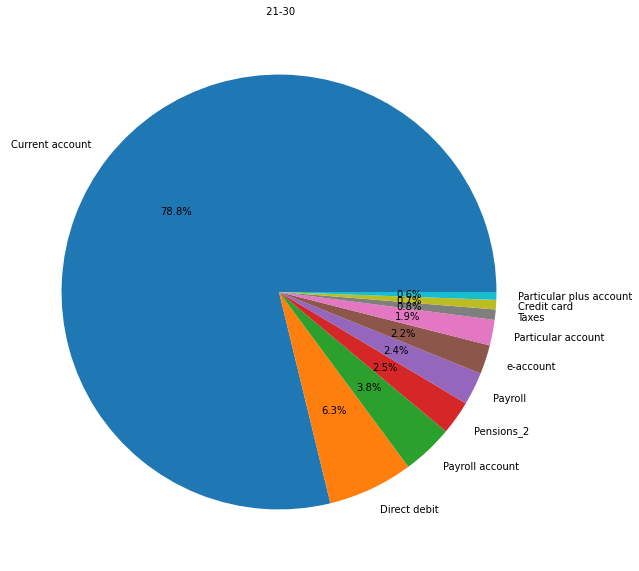

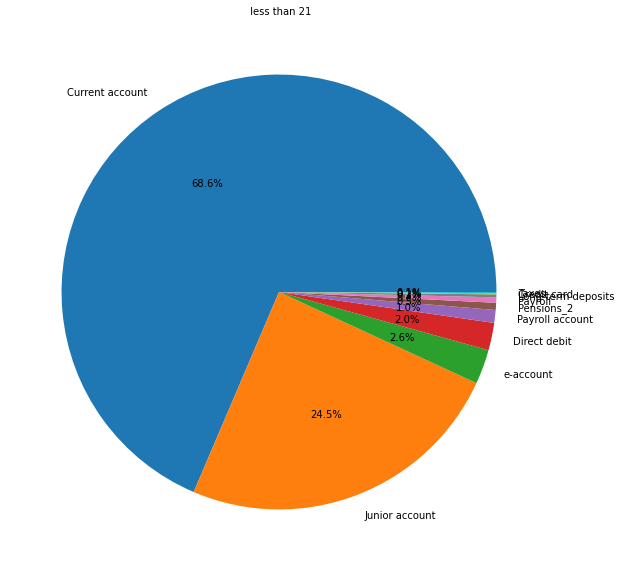

In [21]:
## Create variable that will automate the pie plot process 
def pie_chart(data, figsize, title, fontsize):
    pie, ax = plt.subplots(figsize=figsize)
    labels = data.keys()
    plt.pie(x=data, autopct="%.1f%%", labels=list(labels))
    plt.title(title, fontsize=fontsize)
    
age_group = total_products['Age group'].unique()
for group in age_group:
    data = total_products[products][total_products["Age group"] == group].sum().sort_values(ascending=False).head(10)
    pie_chart(data, [10,10], f' {group}', 10)

- It is seen here that different age groups have different customer behavior. For example the age group with the lowest amount of Current account is customers that are between 41 and 65 whereas customers that are between 21 and 30 have the most.


In [88]:
total_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794203 entries, 0 to 794202
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Customer_id              794203 non-null  int64 
 1   Saving account           794203 non-null  int64 
 2   Guarantees               794203 non-null  int64 
 3   Current account          794203 non-null  int64 
 4   Derivada account         794203 non-null  int64 
 5   Payroll account          794203 non-null  int64 
 6   Junior account           794203 non-null  int64 
 7   Most particular account  794203 non-null  int64 
 8   Particular account       794203 non-null  int64 
 9   Particular plus account  794203 non-null  int64 
 10  Short-term deposits      794203 non-null  int64 
 11  Medium-term deposits     794203 non-null  int64 
 12  Long-term deposits       794203 non-null  int64 
 13  e-account                794203 non-null  int64 
 14  Funds               

### Customer products by gender

In [24]:
cust_products = cust.loc[:,"Saving account":"Direct debit"]
df_sex = cust.loc[:, ["Sex"]].join(cust_products)
df_sex = df_sex.groupby(["Sex"]).sum()
df_sex = df_sex.T

df_sex.head(24)



Sex,F,M
Saving account,113.0,40.0
Guarantees,26.0,11.0
Current account,342323.0,270689.0
Derivada account,416.0,71.0
Payroll account,54990.0,36653.0
Junior account,6085.0,5663.0
Most particular account,4830.0,3309.0
Particular account,110931.0,67061.0
Particular plus account,37421.0,23802.0
Short-term deposits,974.0,680.0


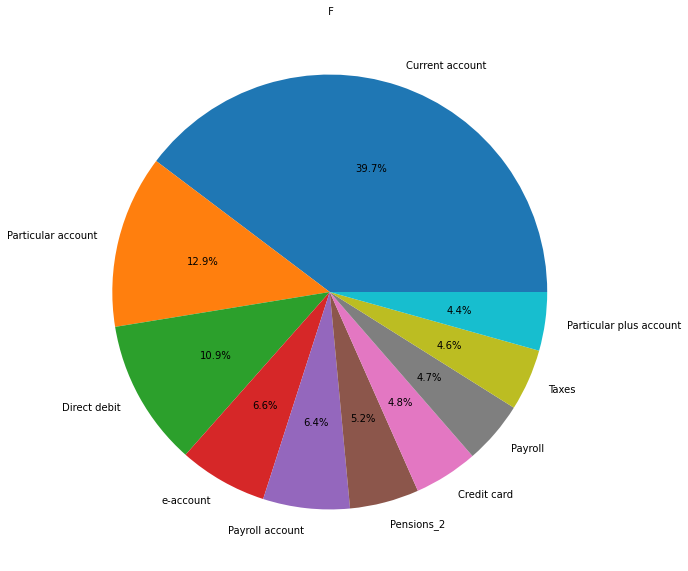

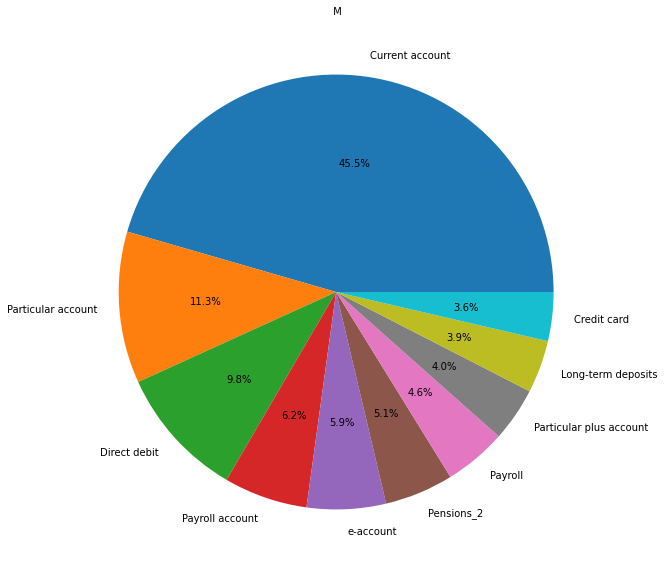

In [40]:
df_gender_merge = cust[['Customer_id','Sex']].drop_duplicates()
total_products = total_products.merge(df_gender_merge, on='Customer_id')
segmentation_group = total_products['Sex'].unique()
for sex in segmentation_group:
    data = total_products[products][total_products['Sex'] == sex].sum().sort_values(ascending=False).head(10)
    pie_chart(data, [10,10], f' {sex}',10)

- While not too much significant difference, customers with males have more percentage of current account, while females have more of other accounts particularly Particular account. But nonetheless, current account has the highest percentage.

### Customers by income

In [16]:
def income_group(x):
    if x <= 30000:
        return "income less than 30,000"
    elif x > 30000 and x <= 50000:
        return "income between 30,000 and 50,000"
    elif x > 50000 and x <= 100000:
        return "income between 50,000 and 100,000"
    elif x > 100000 and x <= 500000:
        return "income between 100,000 and 500,000"
    else:
        return "income greater than 500,000"
    
cust['Income group']  = cust['Income'].apply(income_group)
    

Text(0.5, 1.0, 'Gross Household Income Distribution')

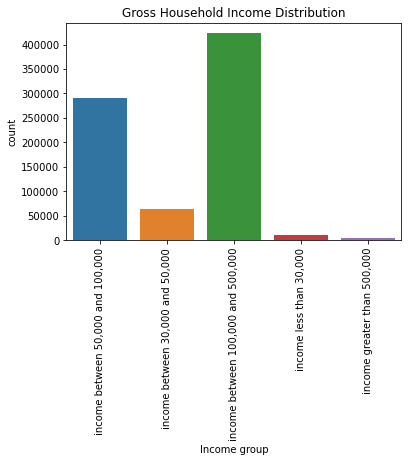

In [31]:
sns.countplot(x = "Income group",data = cust)
plt.xticks(rotation = 90)
plt.title('Gross Household Income Distribution')

In [32]:
df_income_merge = cust[['Customer_id','Income group']].drop_duplicates()

In [33]:
total_products = total_products.merge(df_income_merge, on='Customer_id')

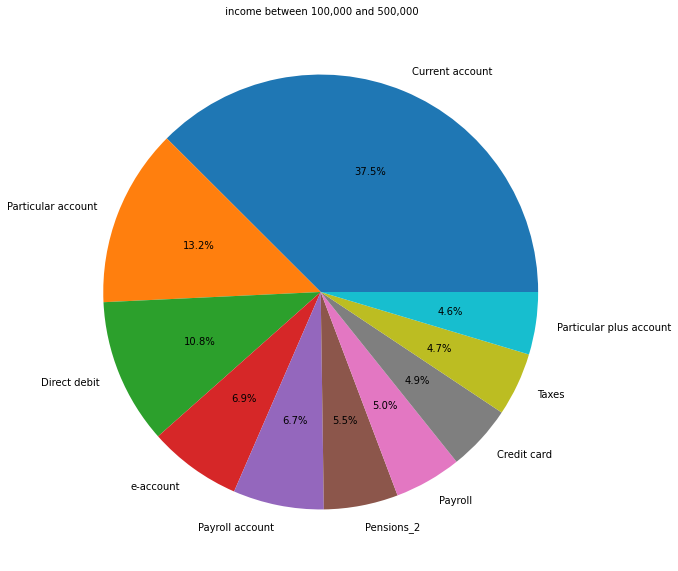

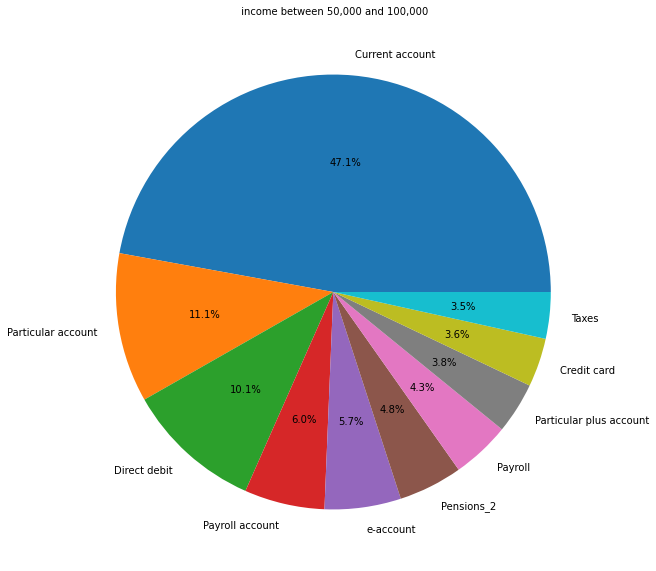

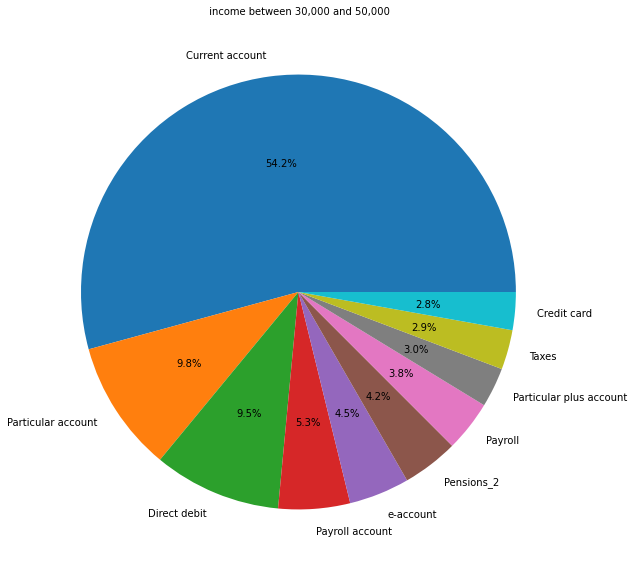

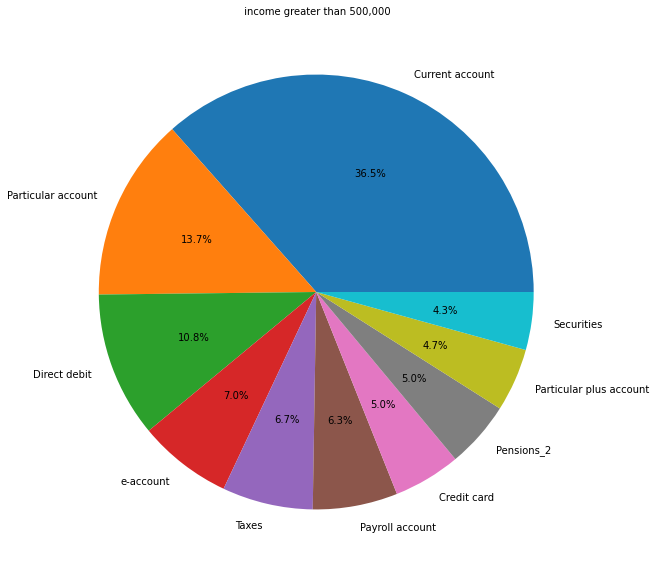

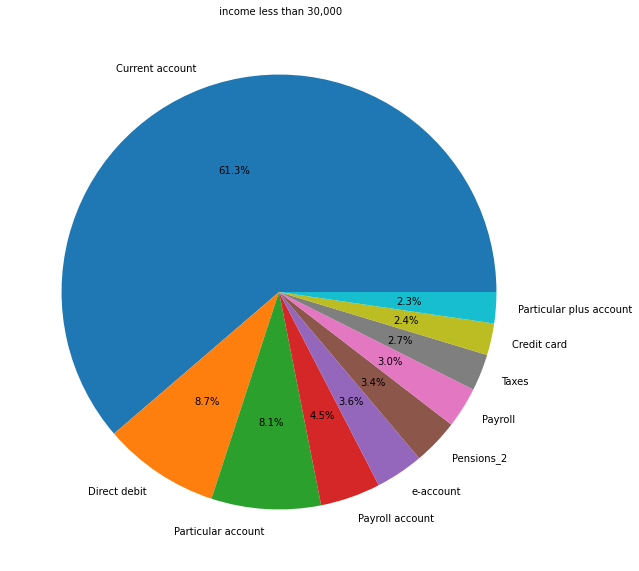

In [34]:
segmentation_group = total_products['Income group'].unique()
for income in segmentation_group:
    data = total_products[products][total_products['Income group'] == income].sum().sort_values(ascending=False).head(10)
    pie_chart(data, [10,10], f' {income}',10)

##### Income group by city

In [32]:
## Income by city
Income_city = pd.crosstab(cust['Province name'],cust['Income group'],margins = False)
print(Income_city)

Income group            income between 100,000 and 500,000  \
Province name                                                
ALBACETE                                              1803   
ALICANTE                                              4368   
ALMERIA                                                859   
ASTURIAS                                              5784   
AVILA                                                  411   
BADAJOZ                                               1810   
BALEARS, ILLES                                        3236   
BARCELONA                                            50022   
BIZKAIA                                                  2   
BURGOS                                                2282   
CACERES                                               1428   
CADIZ                                                 5520   
CANTABRIA                                             4061   
CASTELLON                                             1101   
CEUTA   

In [37]:
df_city_merge = cust[['Customer_id','Province name']].drop_duplicates()

In [38]:
total_products = total_products.merge(df_city_merge, on = "Customer_id")

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_1732\1555037213.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  pie, ax = plt.subplots(figsize=figsize)


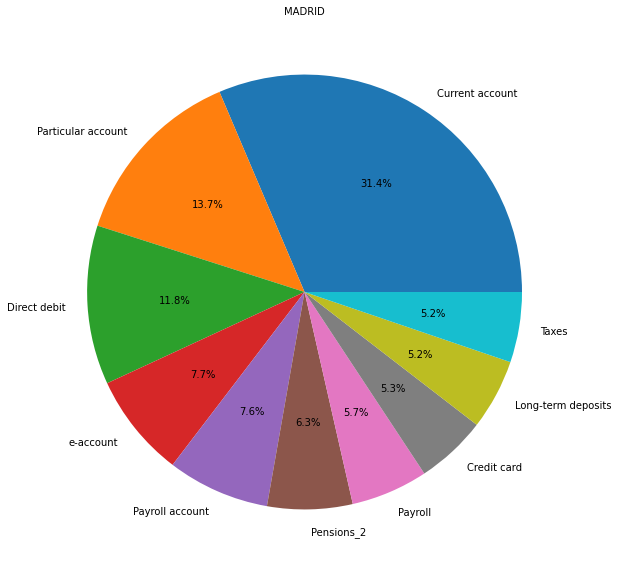

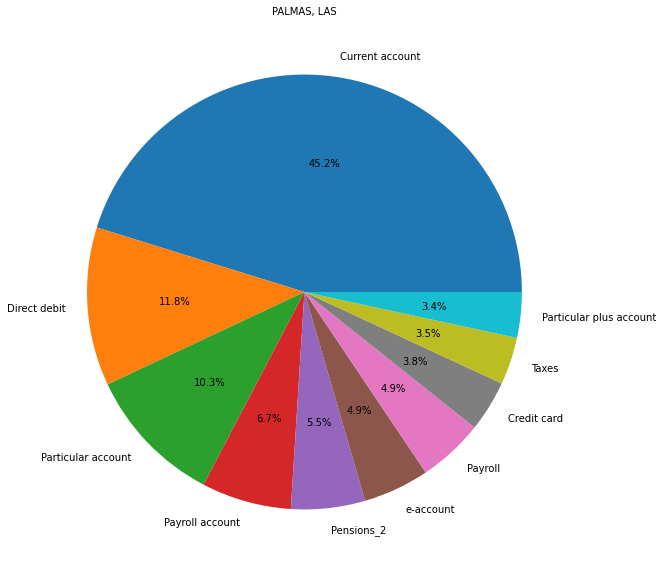

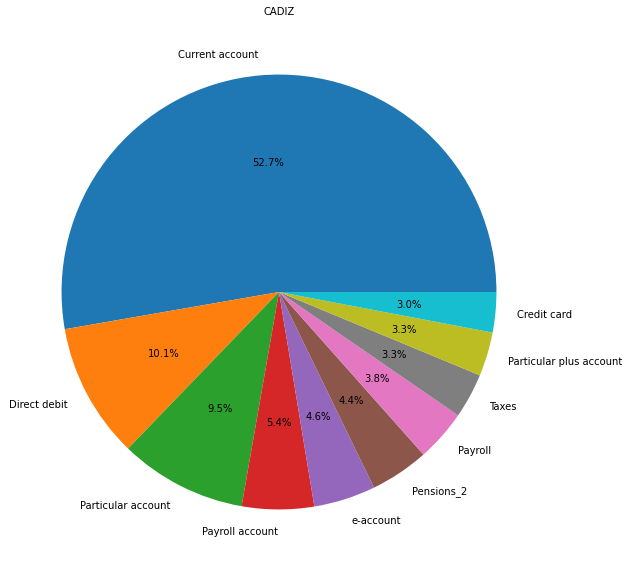

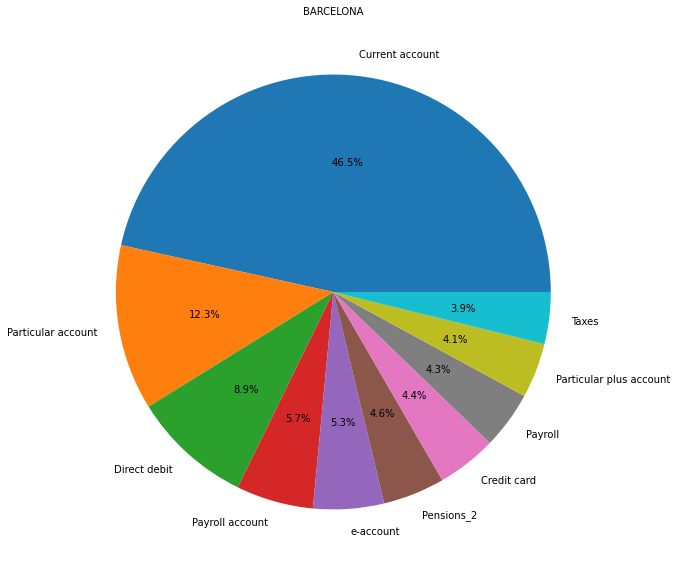

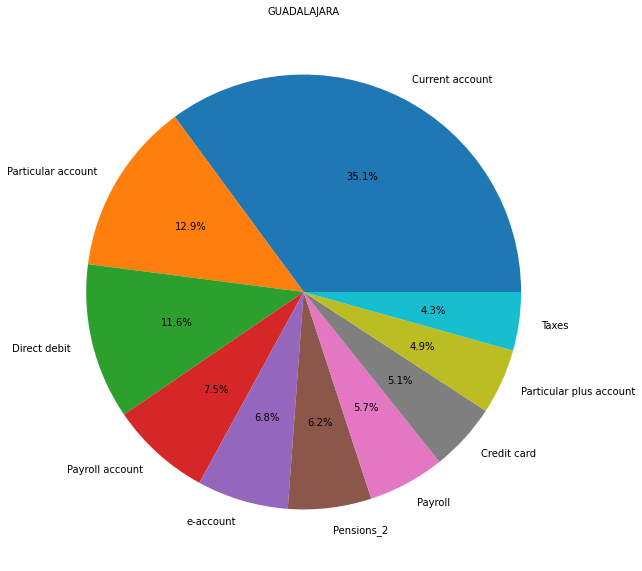

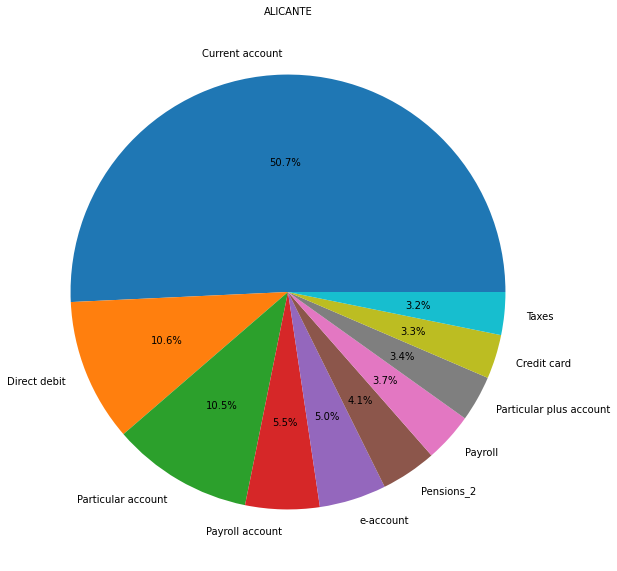

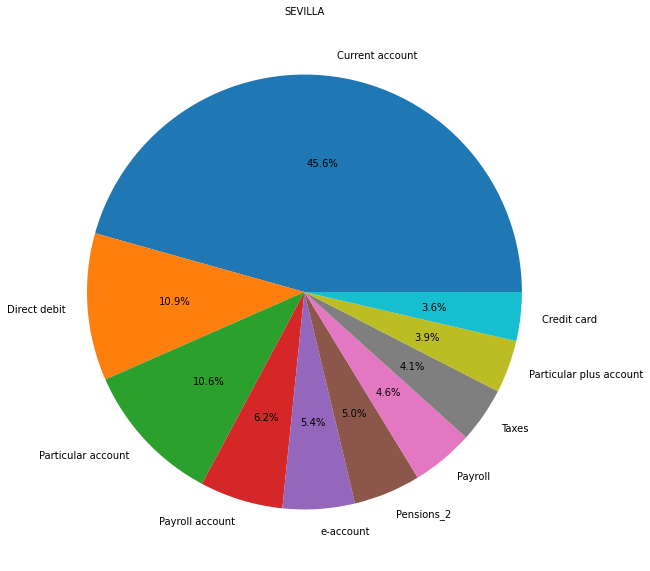

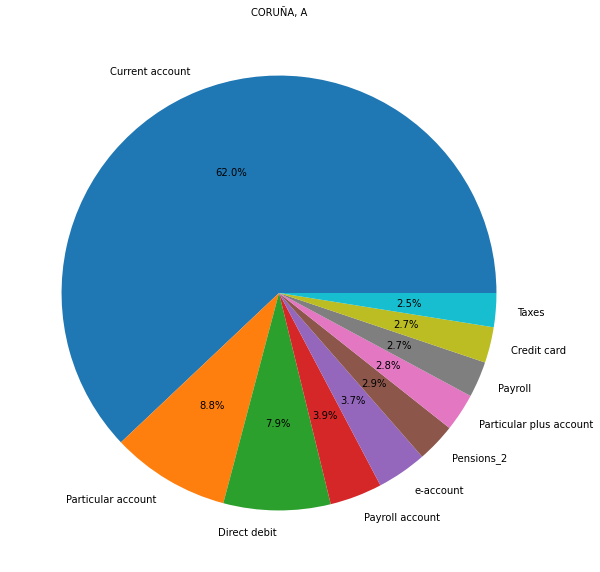

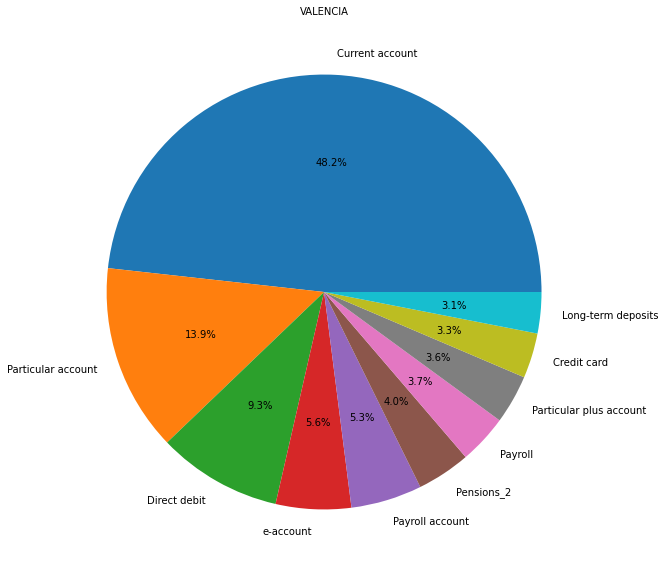

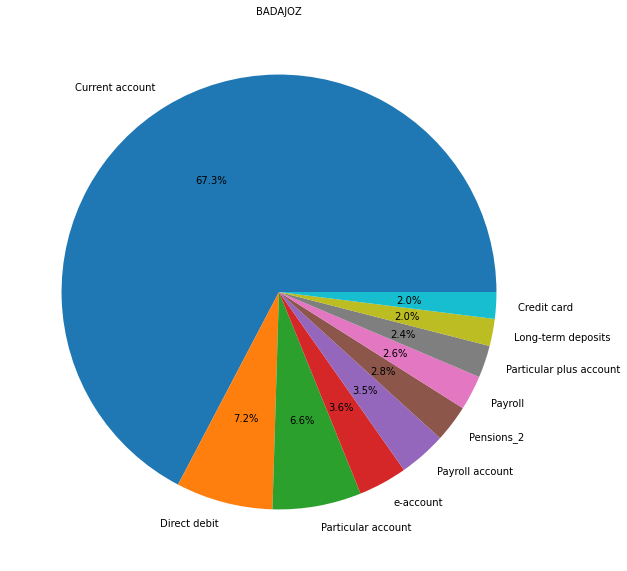

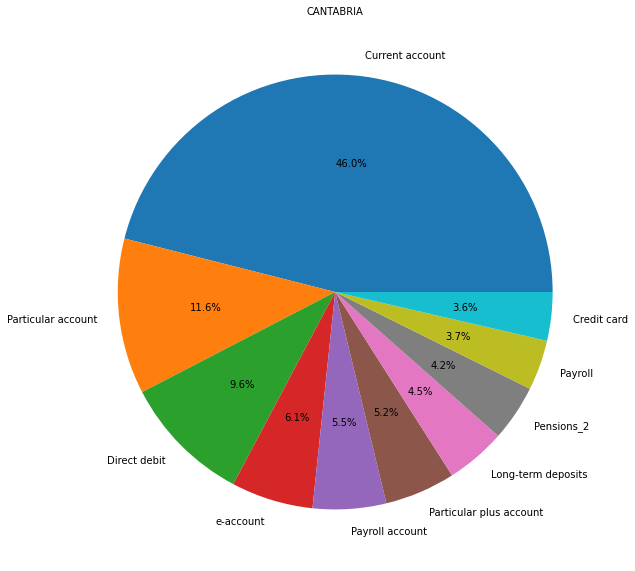

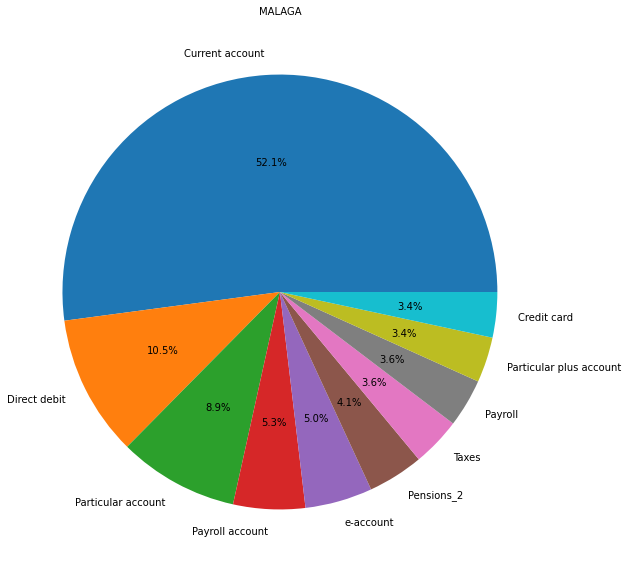

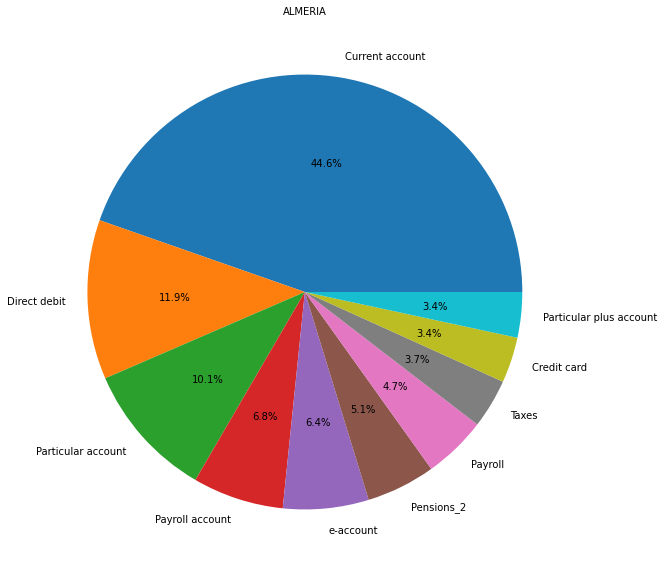

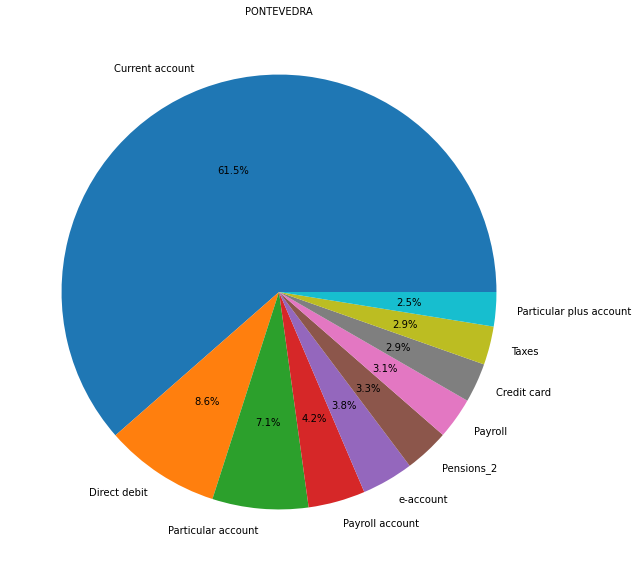

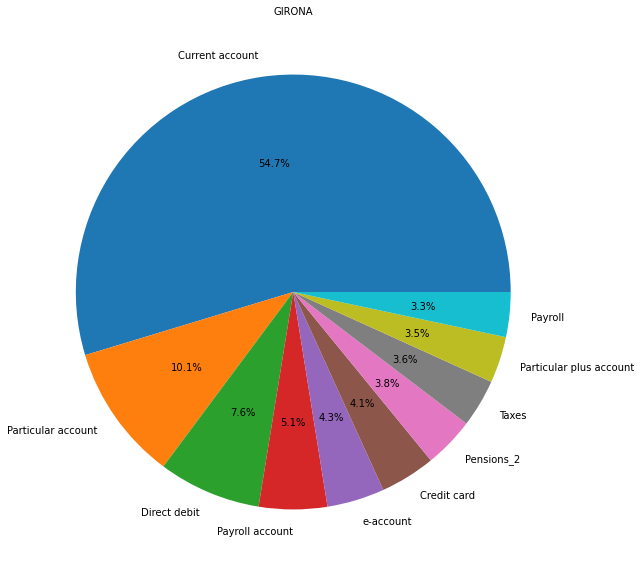

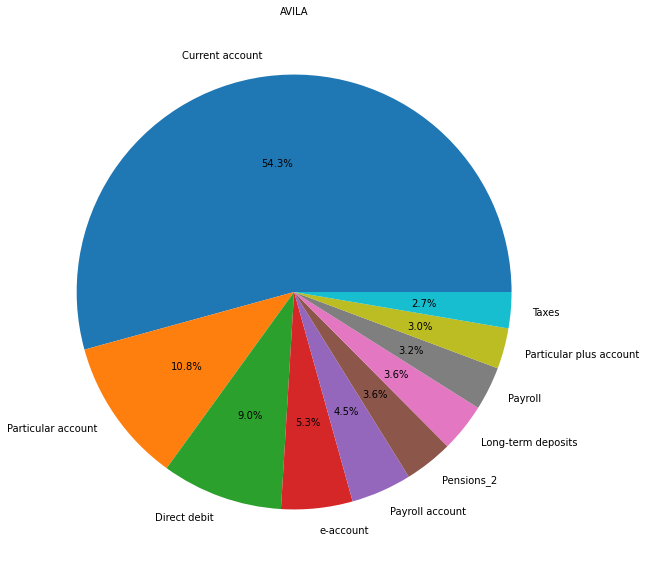

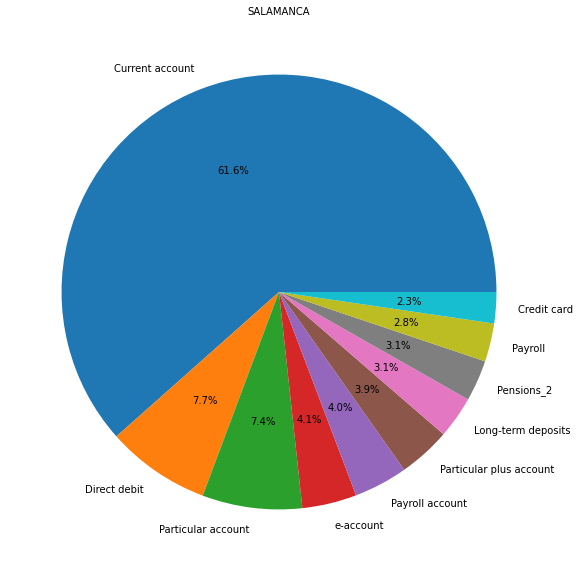

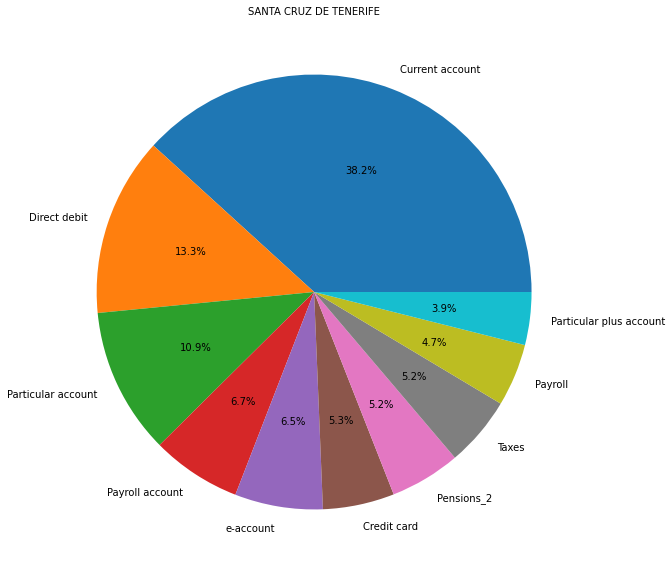

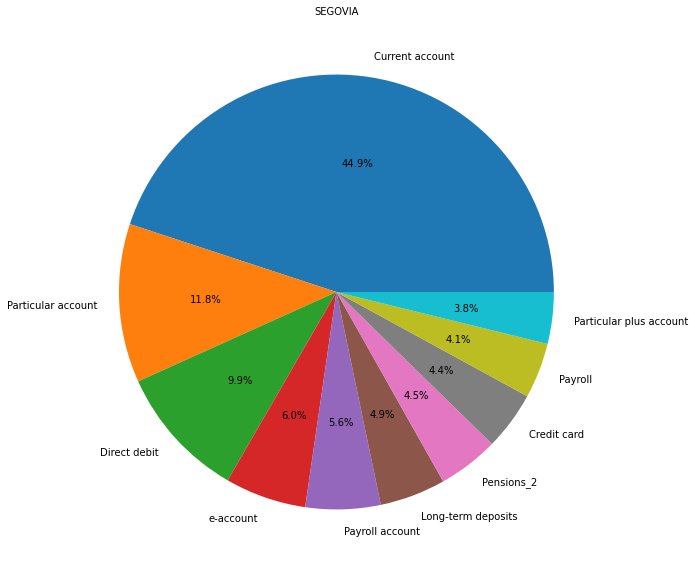

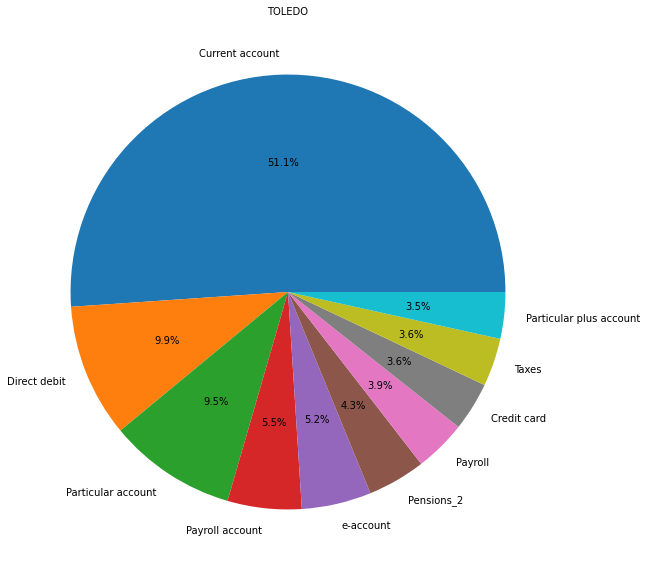

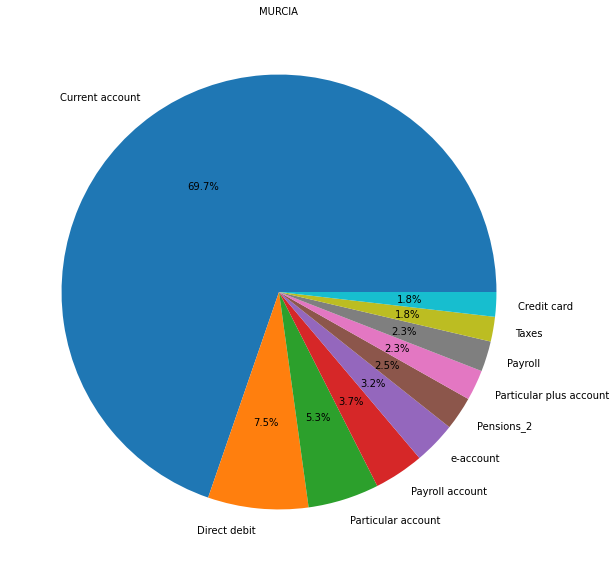

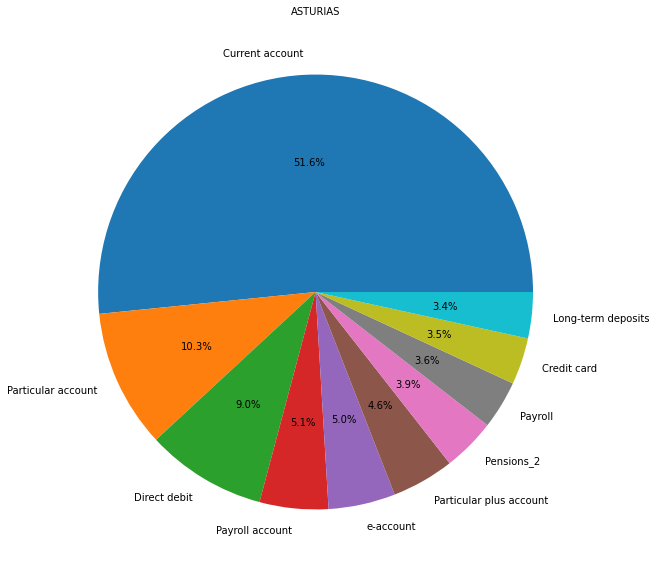

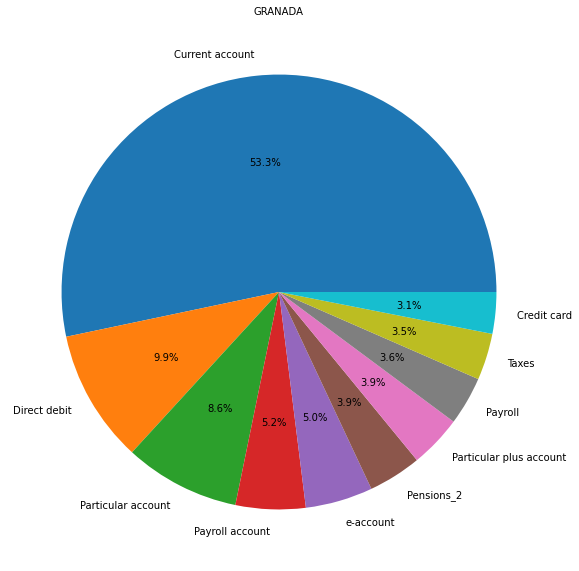

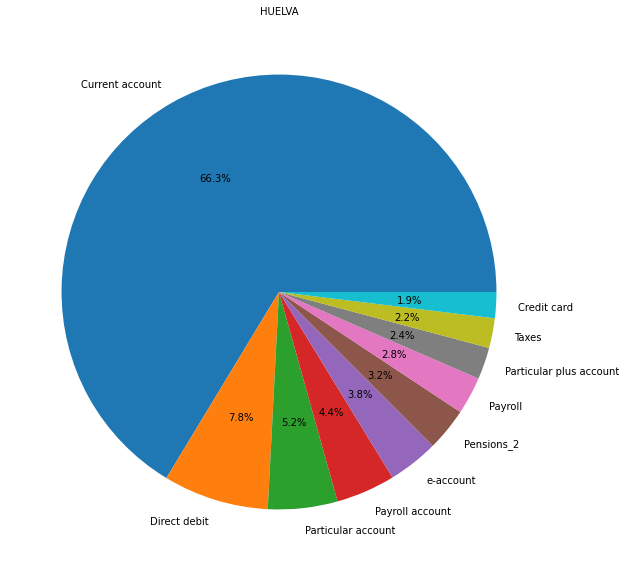

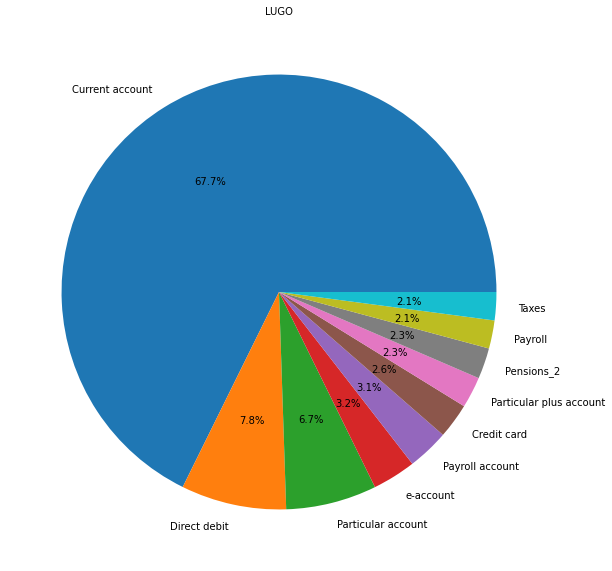

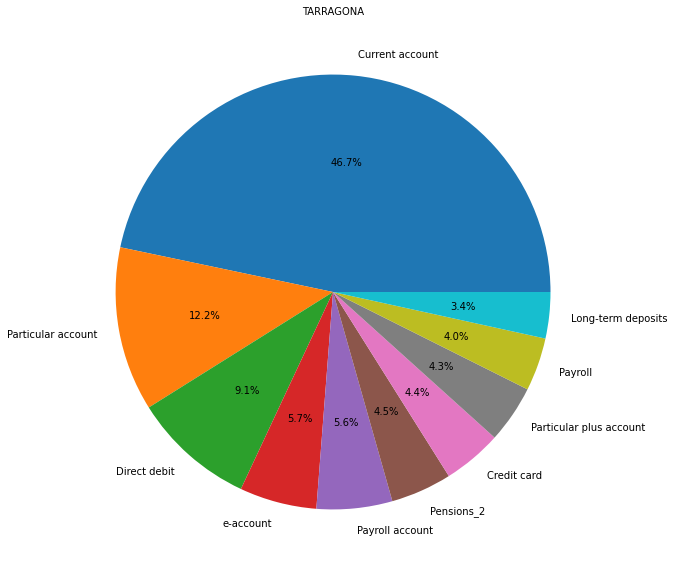

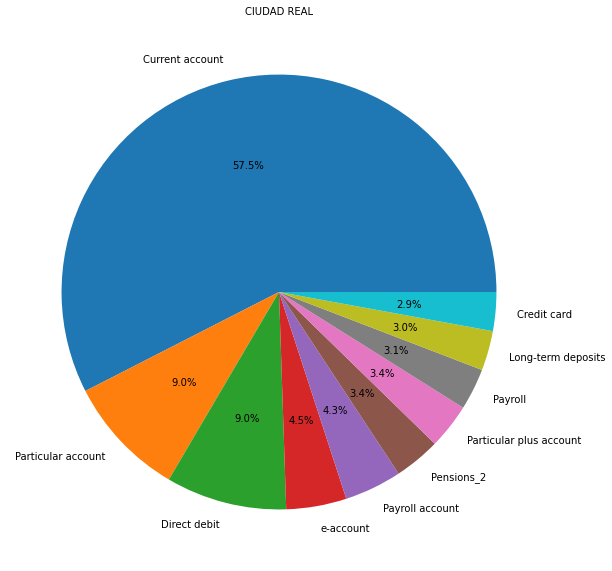

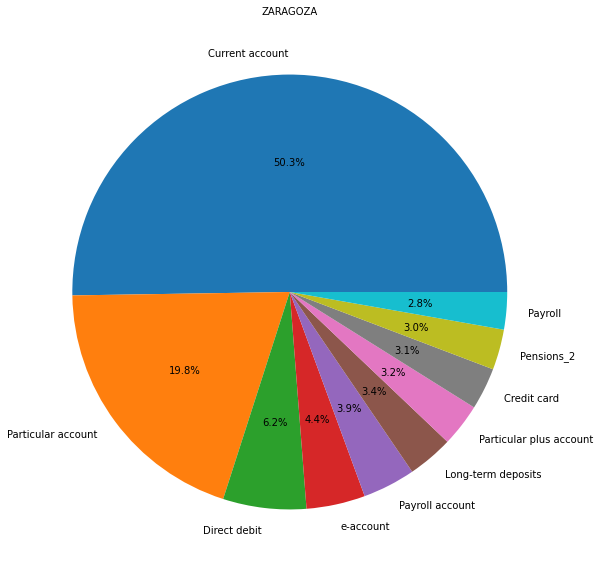

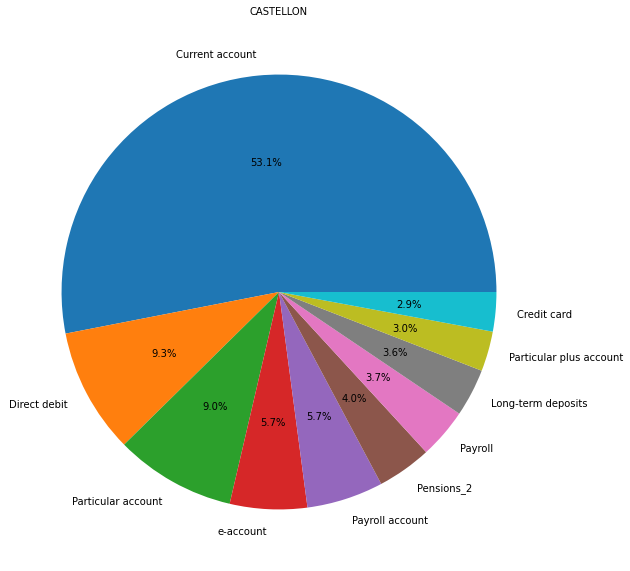

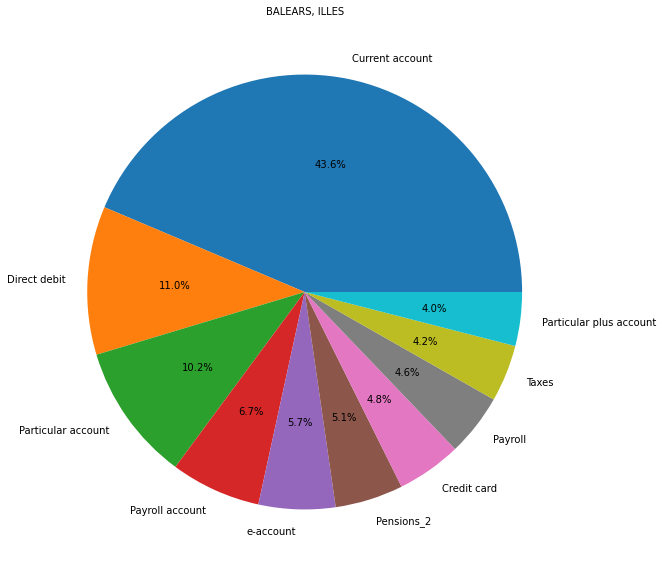

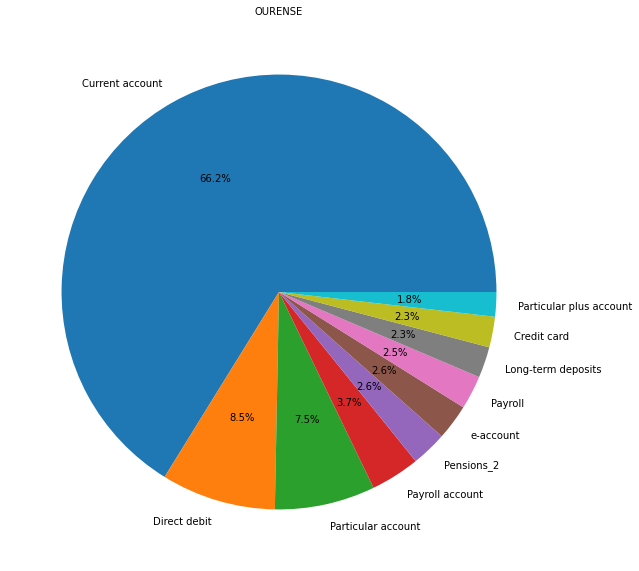

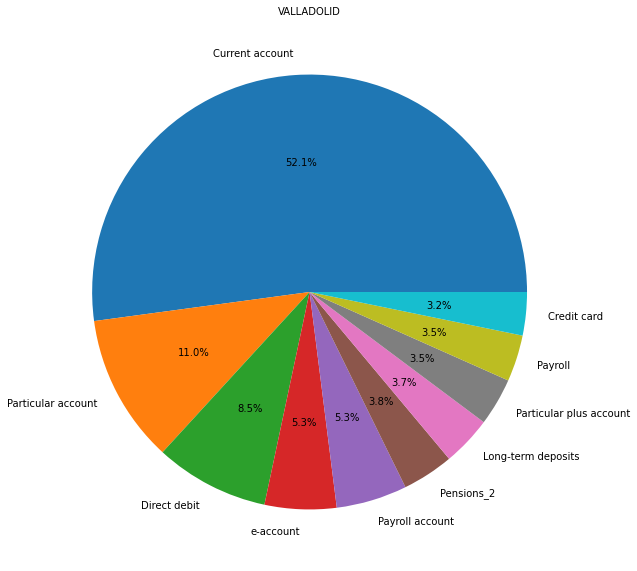

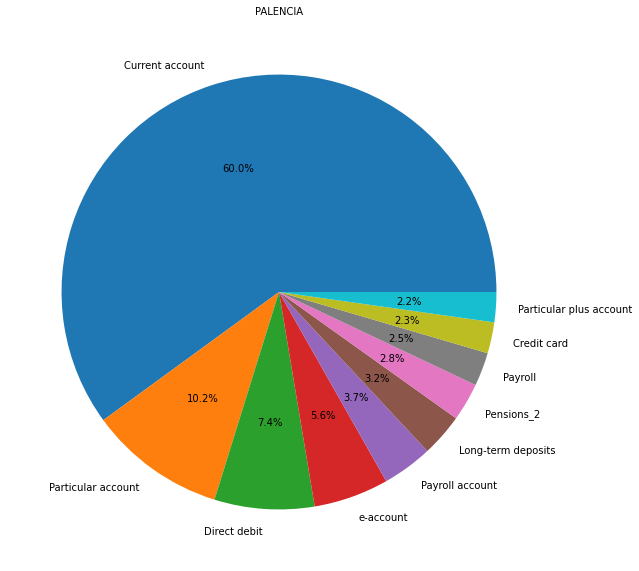

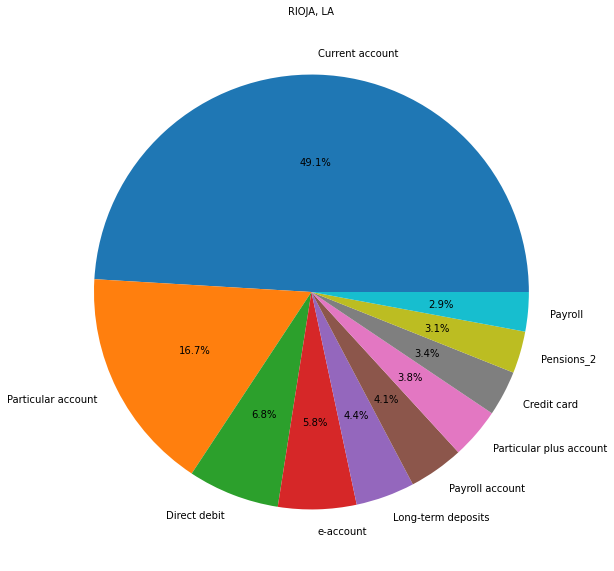

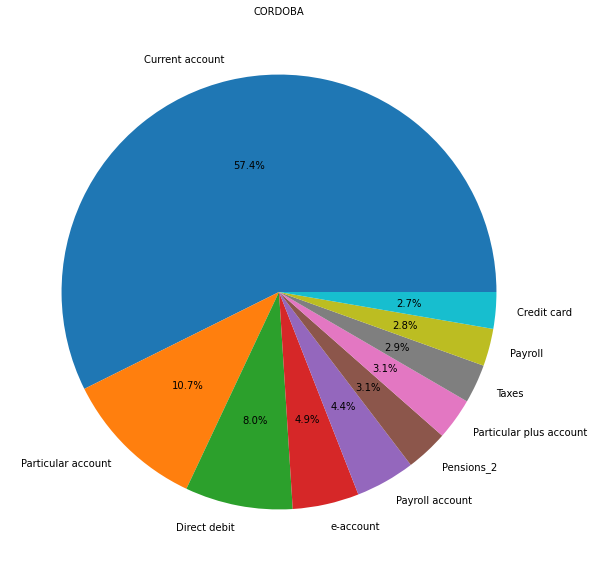

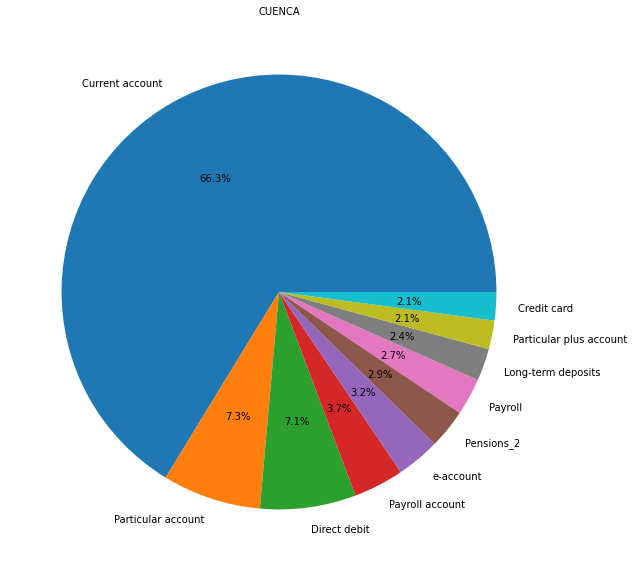

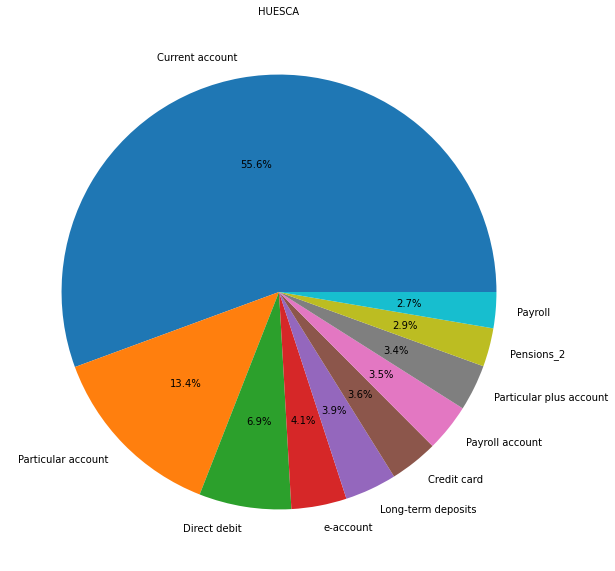

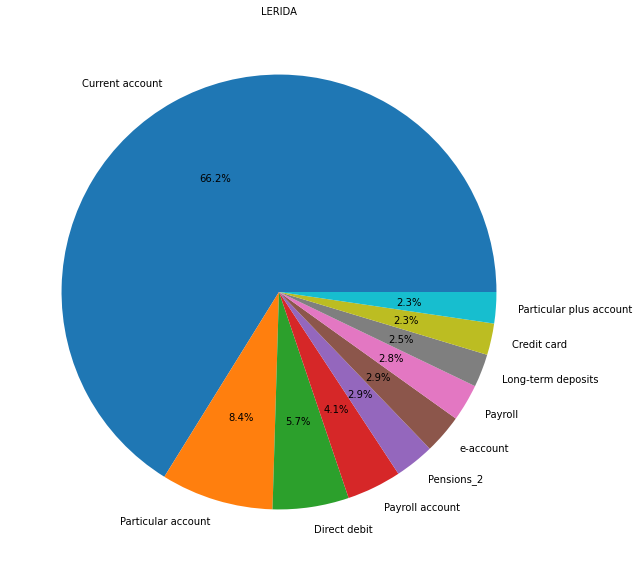

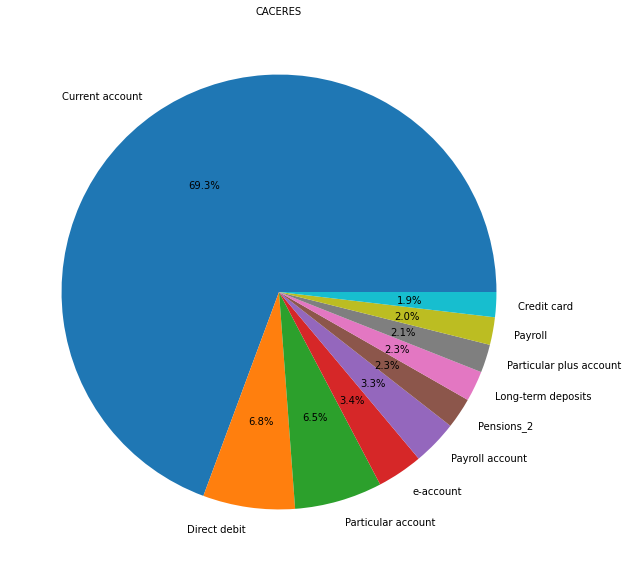

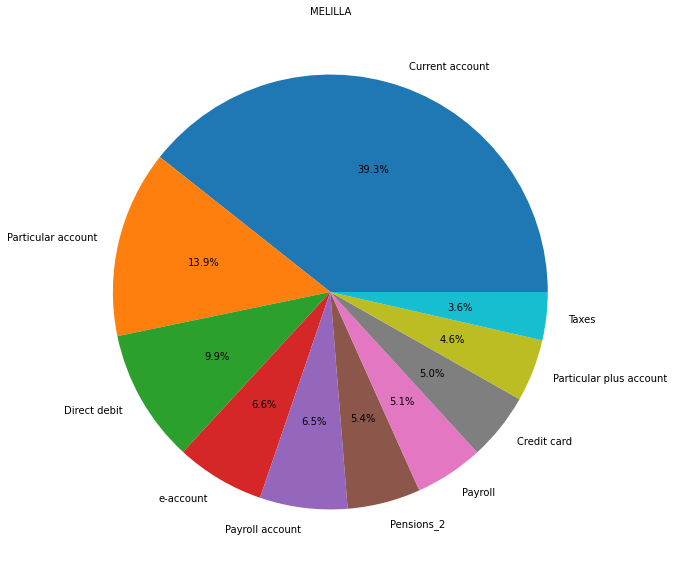

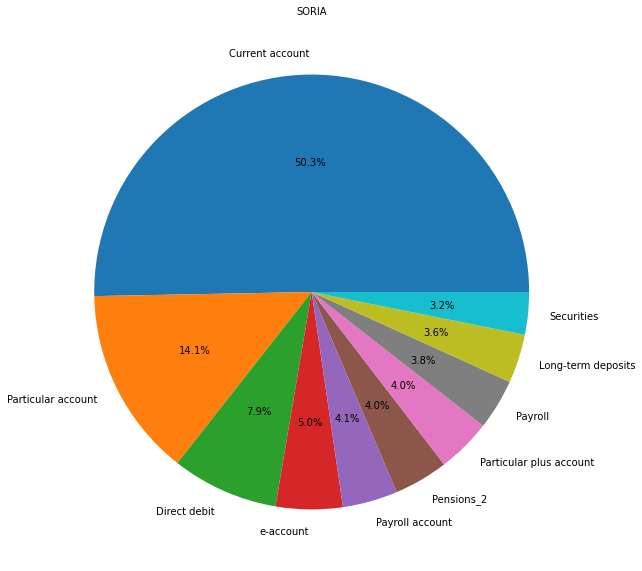

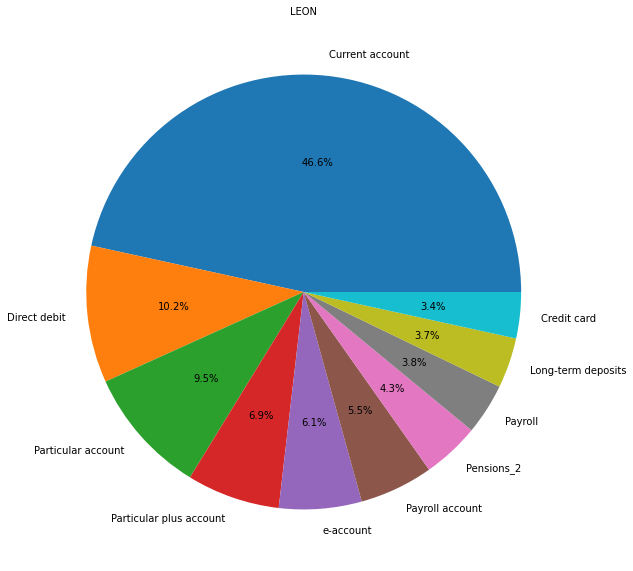

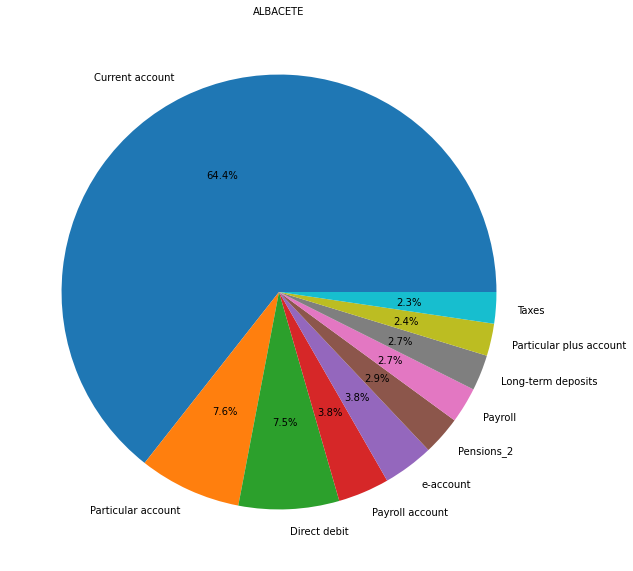

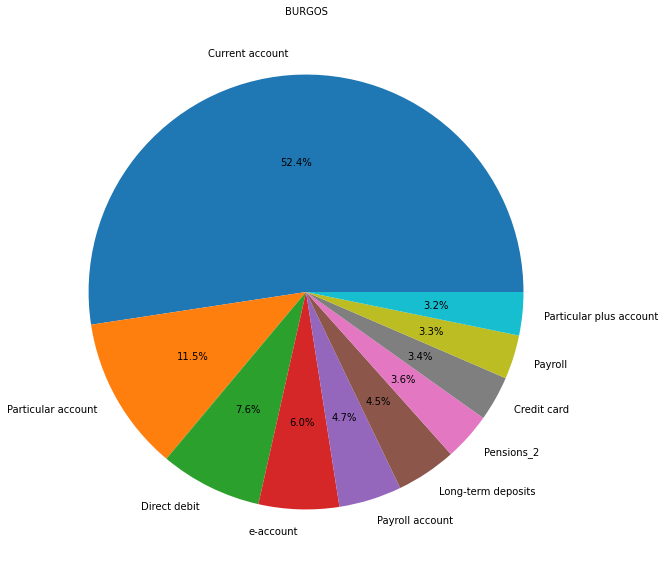

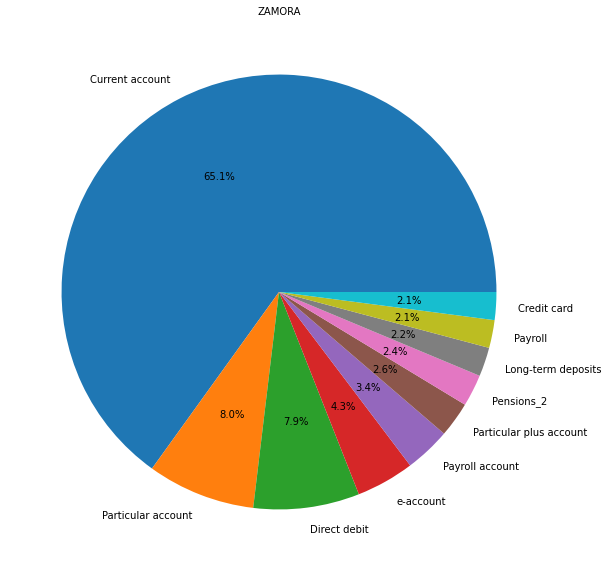

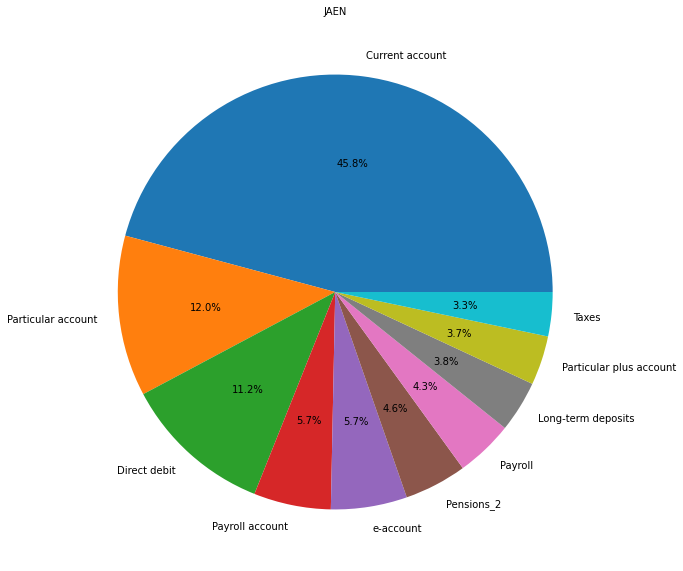

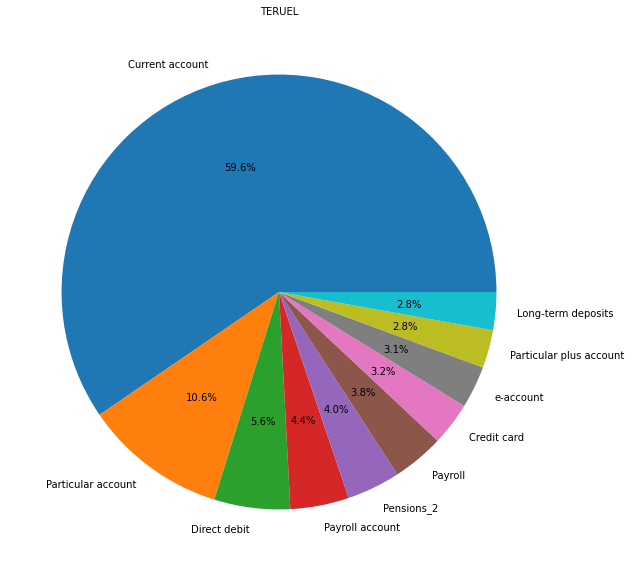

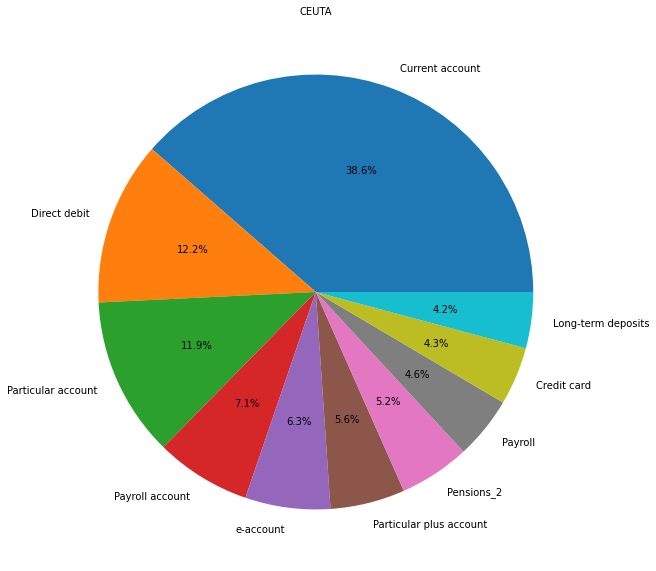

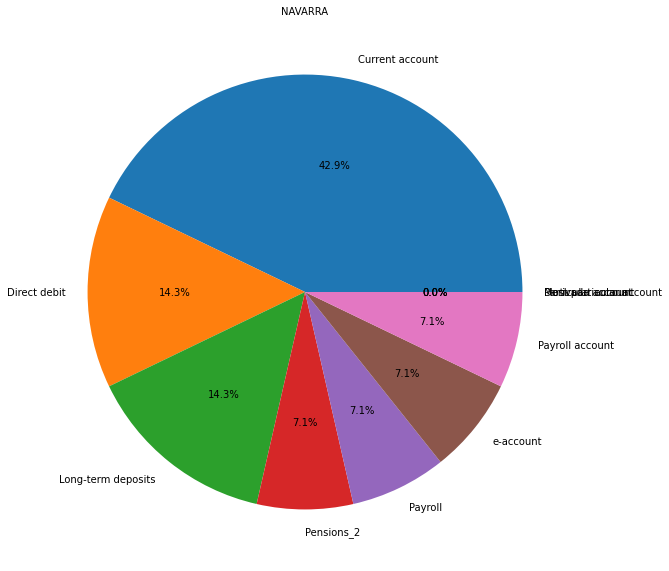

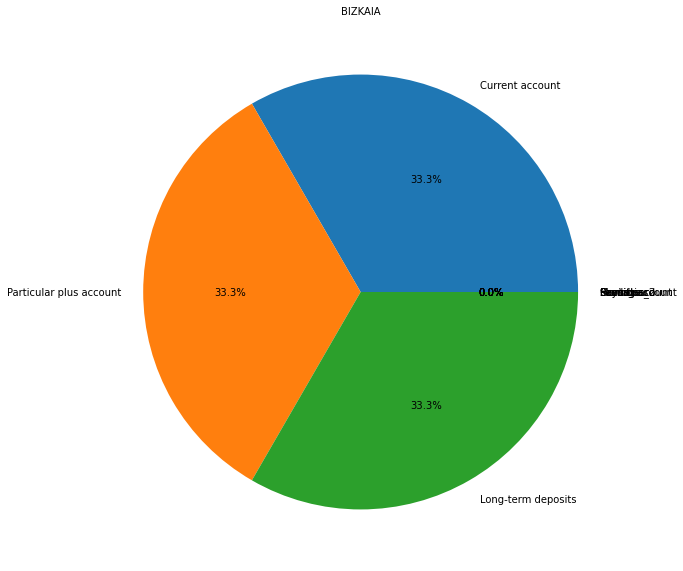

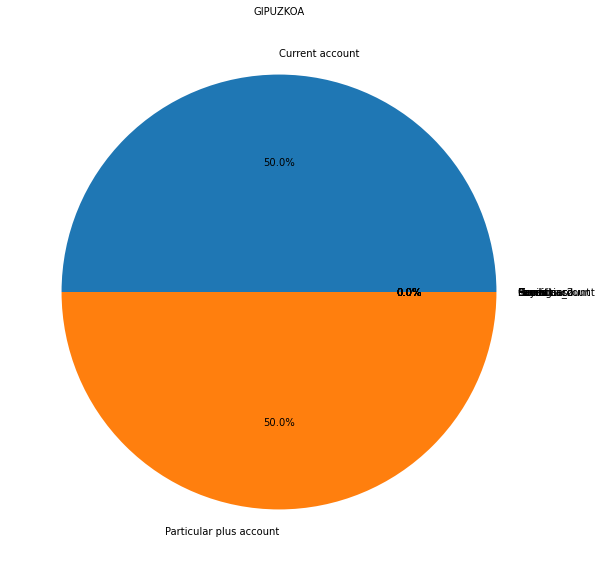

In [39]:
segmentation_group = total_products['Province name'].unique()
for city in segmentation_group:
    data = total_products[products][total_products['Province name'] == city].sum().sort_values(ascending=False).head(10)
    pie_chart(data, [10,10], f'{city}',10)

##### Income group by age

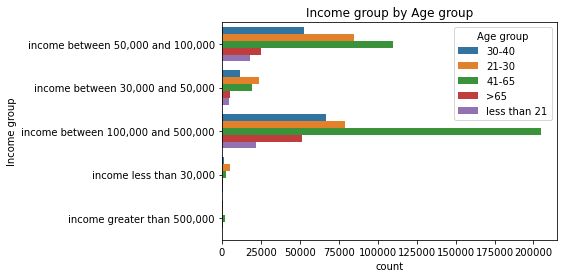

In [33]:
sns.countplot(y='Income group', hue='Age group', data=cust)
plt.title("Income group by Age group")
plt.show()

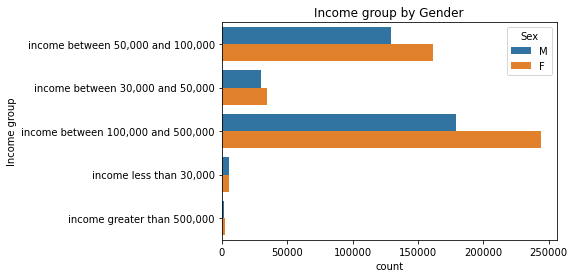

In [17]:
sns.countplot(y='Income group', hue='Sex', data=cust)
plt.title("Income group by Gender")
plt.show()

## Customer products by seniority


<AxesSubplot:>

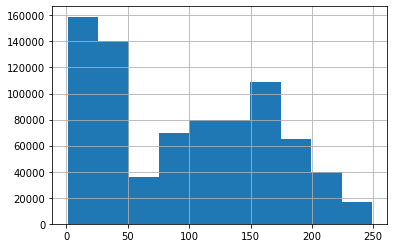

In [34]:
cust['Seniority(months)'].hist()

In [22]:
def seniority(x):
    if x >= 0 and x <= 50:
        return "customers between 0 and 50 months"
    elif x >= 51 and x <= 100:
        return "customers between 51 and 100 months"
    elif x >= 101 and x <= 150:
        return "customers between 101 and 150 months"
    elif x > 150 and x <= 200:
        return "customers between 151 and 200 months"
    else:
        return "customers more than 200 months"

cust['Seniority group'] = cust['Seniority(months)'].apply(seniority)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'customers between 0 and 50 months'),
  Text(1, 0, 'customers between 151 and 200 months'),
  Text(2, 0, 'customers between 51 and 100 months'),
  Text(3, 0, 'customers between 101 and 150 months'),
  Text(4, 0, 'customers more than 200 months')])

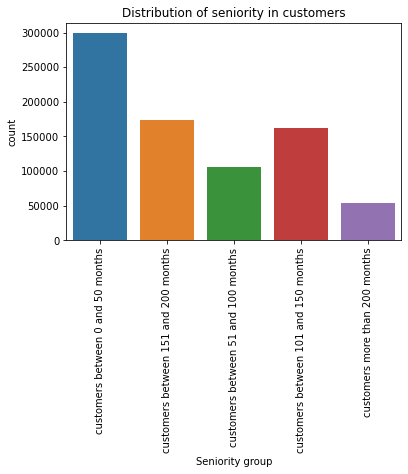

In [25]:
sns.countplot(x = "Seniority group",data = cust)
plt.title('Distribution of seniority in customers')
plt.xticks(rotation = 90)

In [26]:
df_seniority_merge = cust[['Customer_id','Seniority group']].drop_duplicates()

In [27]:
total_products = total_products.merge(df_seniority_merge, on = "Customer_id")

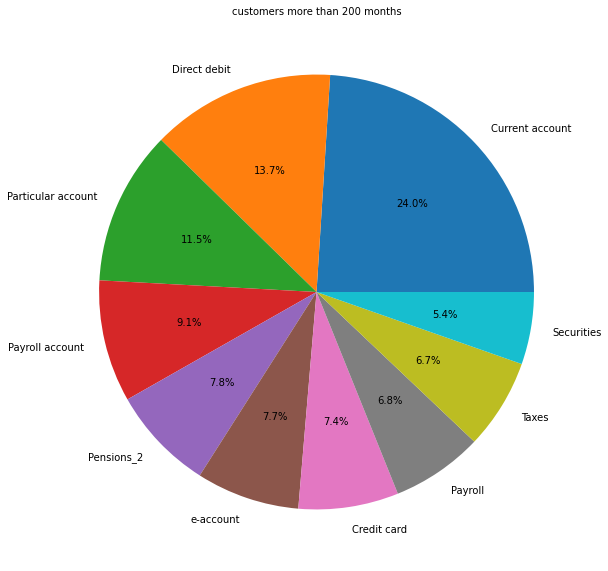

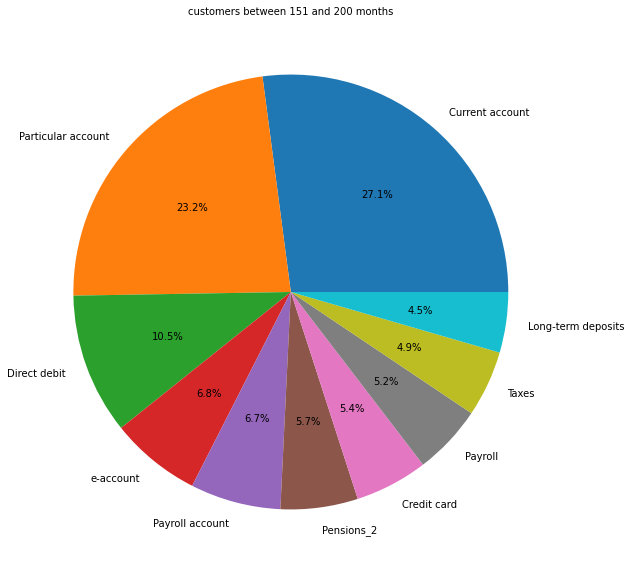

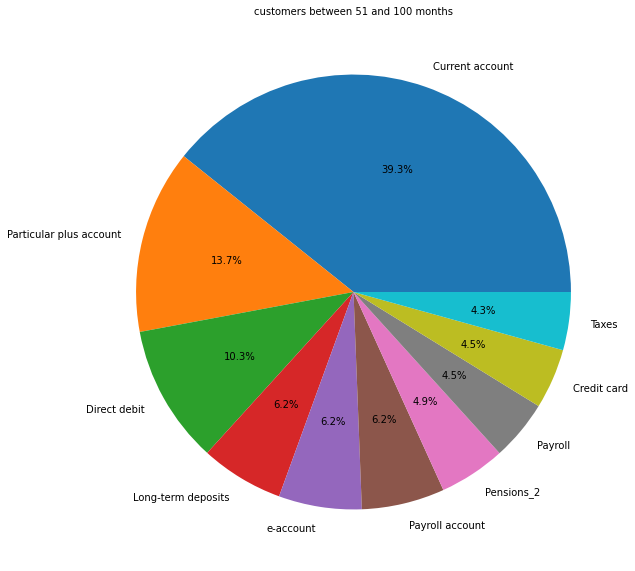

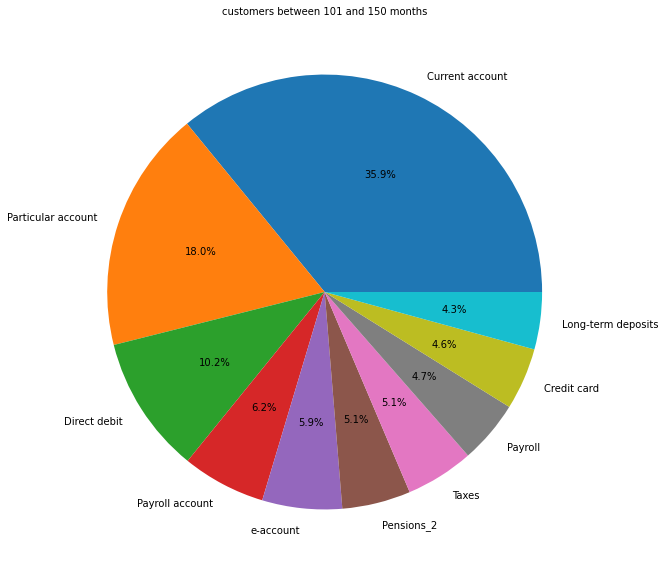

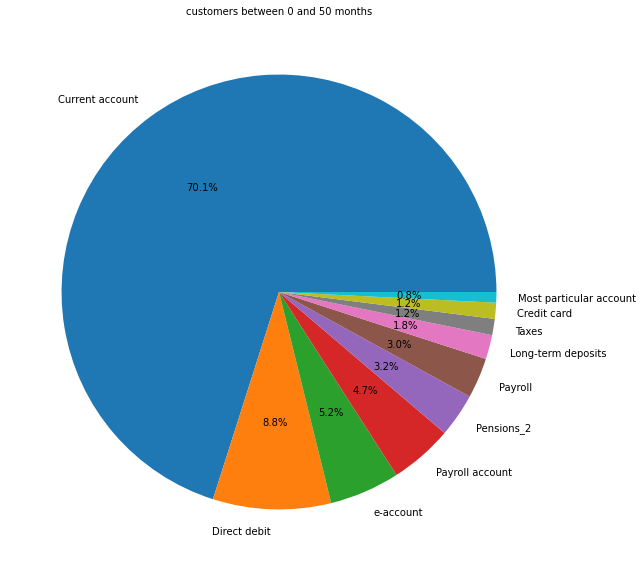

In [28]:
segmentation_group = total_products['Seniority group'].unique()
for seniority in segmentation_group:
    data = total_products[products][total_products['Seniority group'] == seniority].sum().sort_values(ascending=False).head(10)
    pie_chart(data, [10,10], f'{seniority}',10)

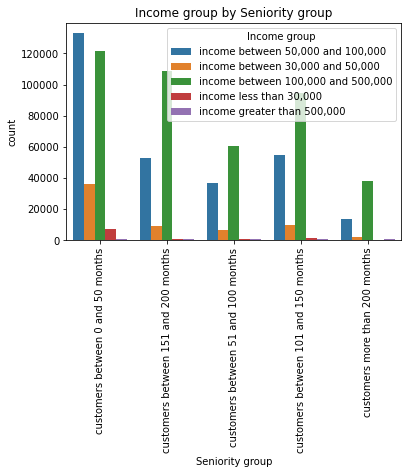

In [36]:
## Income group by seniority group
sns.countplot(x='Seniority group', hue='Income group', data=cust)
plt.title("Income group by Seniority group")
plt.xticks(rotation = 90)
plt.show()

In [39]:
Seniority_Age = pd.crosstab(cust['Age group'],cust['Seniority group'],margins = False)
print(Seniority_Age)

Seniority group  customers between 0 and 50 months  \
Age group                                            
21-30                                       181567   
30-40                                        41009   
41-65                                        35999   
>65                                           5421   
less than 21                                 34892   

Seniority group  customers between 101 and 150 months  \
Age group                                               
21-30                                            5450   
30-40                                           39647   
41-65                                           85898   
>65                                             24306   
less than 21                                     6407   

Seniority group  customers between 151 and 200 months  \
Age group                                               
21-30                                            2056   
30-40                                           22

In [40]:
Seniority_city = pd.crosstab(cust['Province name'], cust['Seniority group'],margins = False)
print(Seniority_city)

Seniority group         customers between 0 and 50 months  \
Province name                                               
ALBACETE                                             4406   
ALICANTE                                             7745   
ALMERIA                                              1546   
ASTURIAS                                             6670   
AVILA                                                1190   
BADAJOZ                                              7253   
BALEARS, ILLES                                       1902   
BARCELONA                                           27189   
BIZKAIA                                                 0   
BURGOS                                               2790   
CACERES                                              5188   
CADIZ                                                9316   
CANTABRIA                                            3008   
CASTELLON                                            2808   
CEUTA                   

- We can see that seniority has an effect on the distribution of behavior of customers

In [129]:
df_channel = cust.query('Channel in ["KAT", "KFC", "KHE", "KFA"]')

In [109]:
df_channel.head()

,Date,Customer_id,Employee index,Country,Gender,Age,Contract date,New customer index,Seniority(months),Primary,...,Securities,Home account,Payroll,Pensions_2,Direct debit,Sex,total_products,Age group,Income group,Seniority group
29,2015-01-28,1050669,N,ES,V,31,2012-08-10,0.0,37,1.0,...,0,0,0.0,0.0,0,F,1.0,30-40,"income between 100,000 and 500,000",customers between 0 and 50 months
30,2015-01-28,1050670,N,ES,V,36,2012-08-10,0.0,37,1.0,...,0,0,0.0,0.0,1,F,2.0,30-40,"income between 50,000 and 100,000",customers between 0 and 50 months
31,2015-01-28,1050676,N,ES,V,30,2012-08-10,0.0,37,1.0,...,0,0,0.0,0.0,0,F,2.0,21-30,"income between 50,000 and 100,000",customers between 0 and 50 months
32,2015-01-28,1050679,N,ES,V,38,2012-08-10,0.0,37,1.0,...,0,0,0.0,0.0,0,F,1.0,30-40,"income between 100,000 and 500,000",customers between 0 and 50 months
34,2015-01-28,1050686,N,ES,V,38,2012-08-10,0.0,37,1.0,...,0,0,0.0,0.0,1,F,3.0,30-40,"income between 30,000 and 50,000",customers between 0 and 50 months


In [134]:
df_channel_merge = df_channel[['Customer_id','Channel']].drop_duplicates()

In [135]:
total_products = total_products.merge(df_channel_merge, on = "Customer_id")

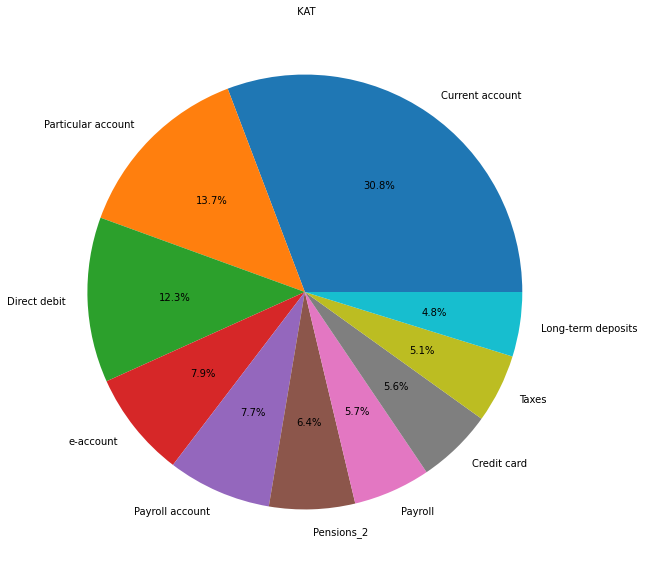

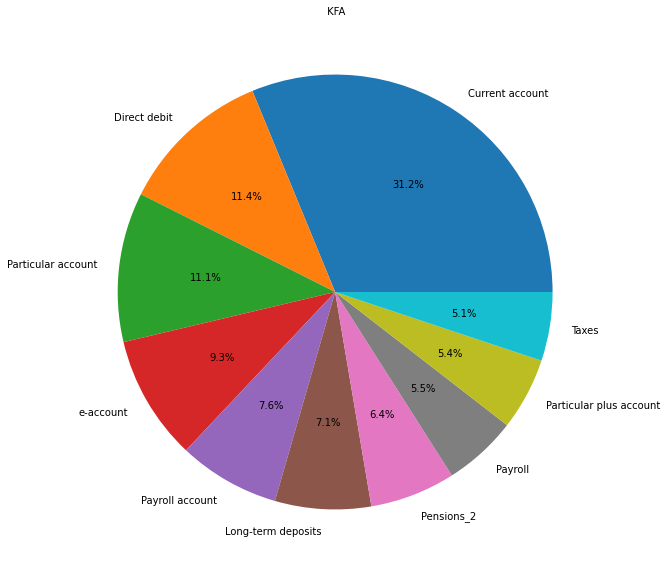

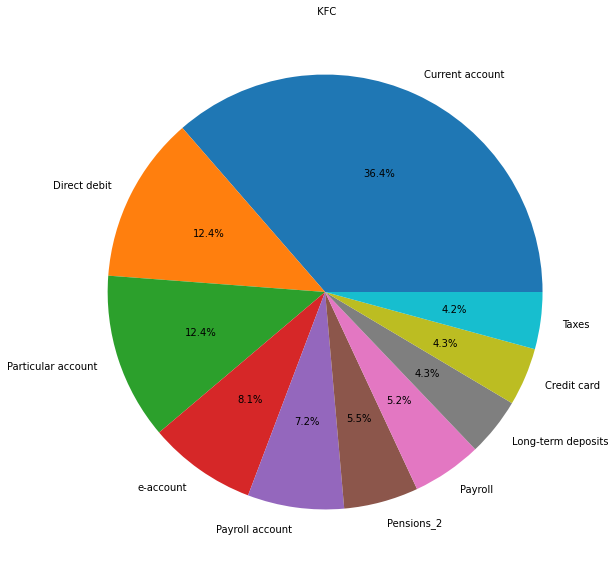

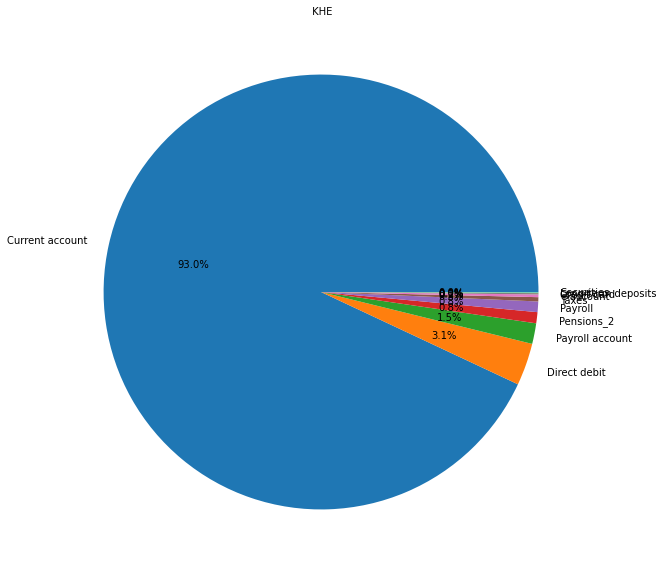

In [136]:
segmentation_group = total_products['Channel'].unique()
for channel in segmentation_group:
    data = total_products[products][total_products['Channel'] == channel].sum().sort_values(ascending=False).head(10)
    pie_chart(data, [20,10], f' {channel}',10)

### Final recommendations

In order to group our customers into 5 separate clusters for our modeling which is the next step we can use our recommendations to help.

-	We can focus on ages that are older than 18-30 as that is where most of the customers are.
-	Males have lower product usage than females, so giving away special offers to males could be a strategy.
-	Since Spain has the most amount of customers overall (mainly just Spain for the data we have) along with Madrid being the most popular city, the bank can focus on other cities/areas in Spain.
-	The bank can focus on individuals separately with regards to their seniority with certain offers given to people with middle and higher seniority and then to people with lower seniority.
